In [1]:
import h5py
import numpy as np
from pandas import HDFStore, read_hdf
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

### Load Data

In [2]:
top50data = read_hdf('../Data/Service.h5')
top50data.head()

,Service Desciption,Service Classification
1,"It has been split into multiple APIs, includin...",Social
3,The Flickr API can be used to retrieve photos ...,Photos
5,What was formerly the ECSeCommerce Servicehas ...,eCommerce
7,The Last.fm API gives users the ability to bui...,Music
10,Bing Maps API and Interactive SDK features an ...,Mapping


In [3]:
top50data.shape

(10184, 2)

## 1. Random Sampling

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#Train, Test = train_test_split(top50data, test_size=0.2, random_state=123456)
Train, Test = train_test_split(top50data, test_size=0.2)

In [6]:
Train.head()

,Service Desciption,Service Classification
3373,Sportradar US is a provider of sports and bett...,Sports
7481,Inbox is a tool that compiles all mail carrier...,Email
10092,Bidvoy is a product value tracking service for...,Tools
14167,"With SciVerse APIs, developers can build appli...",Reference
214,ESPN.com is an online platform for multiple sp...,Sports


In [7]:
Test.head()

,Service Desciption,Service Classification
8964,Cricscore is a free API that delivers near rea...,Sports
1332,RescueTime is built with the idea that you sho...,Project Management
10600,Mention is a social media monitoring applicati...,Social
6504,This API allows you to integrate core Vbout ma...,Marketing
512,Amazon DynamoDB is a scalable NoSQL database h...,Database


In [48]:
Train.shape

(8147, 2)

In [49]:
Test.shape

(2037, 2)

In [19]:
Trainlabelcount = Train['Service Classification'].value_counts()

In [20]:
Trainlabelcount.index

Index(['Tools', 'Financial', 'Messaging', 'Payments', 'eCommerce',
       'Enterprise', 'Social', 'Mapping', 'Telephony', 'Government', 'Science',
       'Email', 'Video', 'Reference', 'Security', 'Sports', 'Transportation',
       'Travel', 'Search', 'Advertising', 'Education', 'Games', 'Photos',
       'Music', 'Cloud', 'Bitcoin', 'Data', 'Other', 'Backend', 'Shipping',
       'Database', 'Project Management', 'Events', 'Weather',
       'Application Development', 'Medical', 'Internet of Things', 'Analytics',
       'Banking', 'Real Estate', 'Stocks', 'Entertainment', 'Storage',
       'Images', 'News Services', 'File Sharing', 'Marketing', 'Media',
       'Domains', 'Chat'],
      dtype='object')

In [21]:
len(Trainlabelcount.index)

50

In [29]:
trainP = Trainlabelcount/Trainlabelcount.sum()

In [22]:
Testlabelcount = Test['Service Classification'].value_counts()

In [23]:
Testlabelcount.index

Index(['Tools', 'Financial', 'Messaging', 'eCommerce', 'Social', 'Payments',
       'Enterprise', 'Mapping', 'Security', 'Science', 'Telephony', 'Travel',
       'Government', 'Reference', 'Music', 'Search', 'Games', 'Video',
       'Sports', 'Project Management', 'Advertising', 'Email', 'Education',
       'Transportation', 'Cloud', 'Photos', 'Other', 'Analytics',
       'Internet of Things', 'Database', 'Storage', 'Weather', 'Chat', 'Data',
       'Backend', 'Application Development', 'Real Estate', 'Bitcoin',
       'Domains', 'Shipping', 'Marketing', 'Media', 'File Sharing', 'Banking',
       'Medical', 'News Services', 'Entertainment', 'Stocks', 'Images',
       'Events'],
      dtype='object')

In [24]:
len(Testlabelcount)

50

In [25]:
Testlabelcount = Testlabelcount[Trainlabelcount.index]

In [26]:
TestP = Testlabelcount/Testlabelcount.sum()

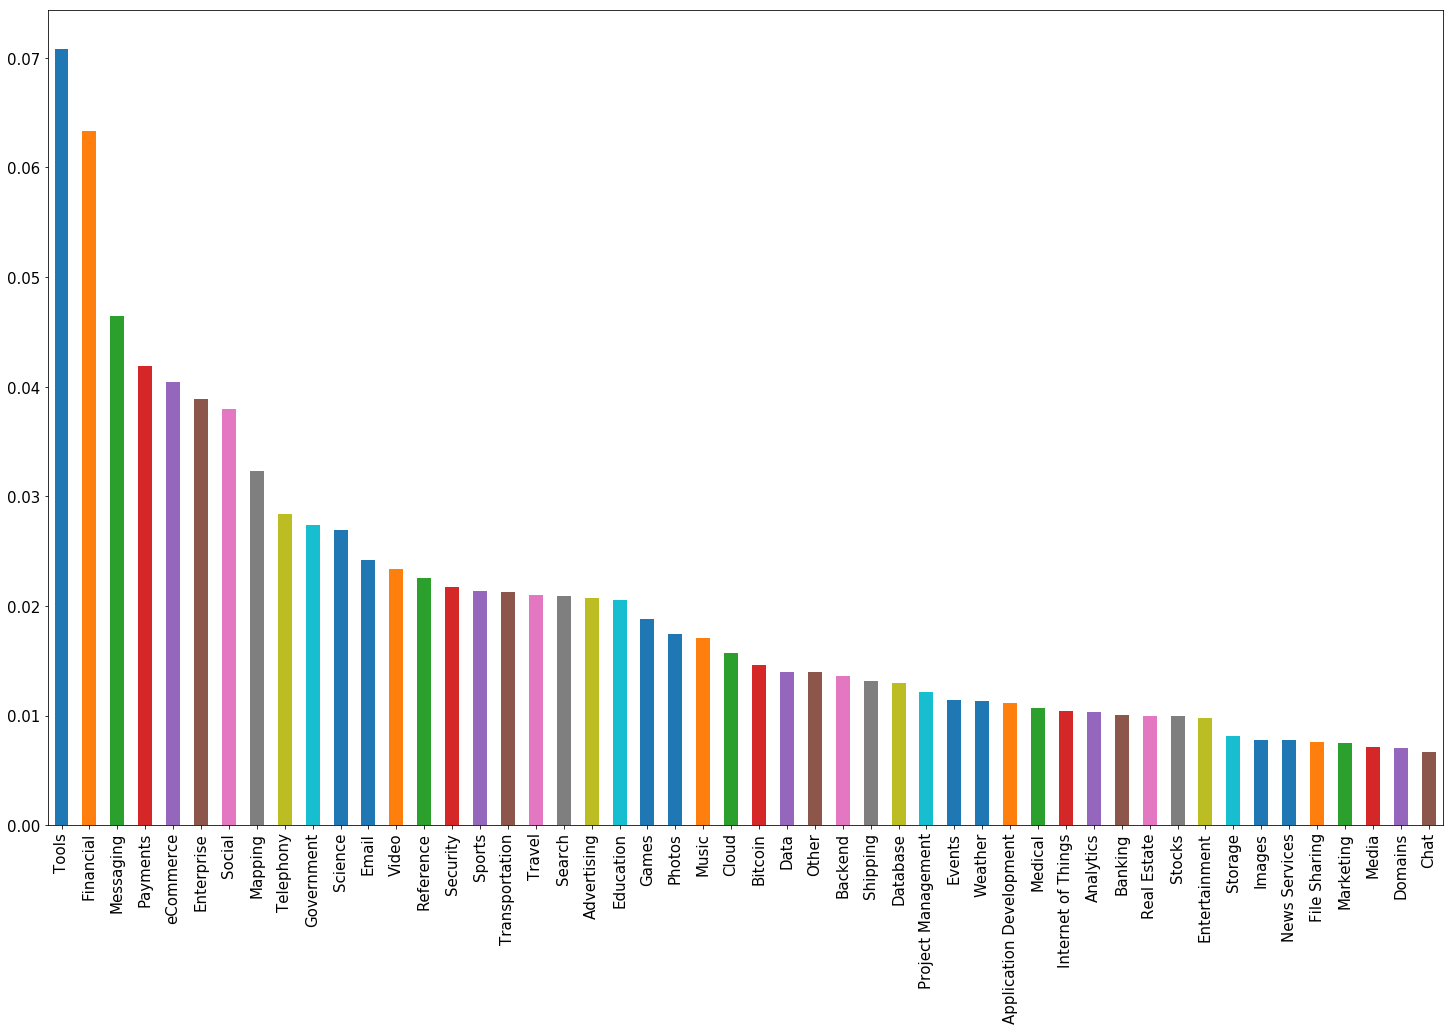

In [35]:
plt.figure(figsize=(25, 15))
trainP.plot(kind='bar', fontsize=15)
plt.savefig('../Data/TrainlabelHistogram.pdf', format='pdf', dpi=300)

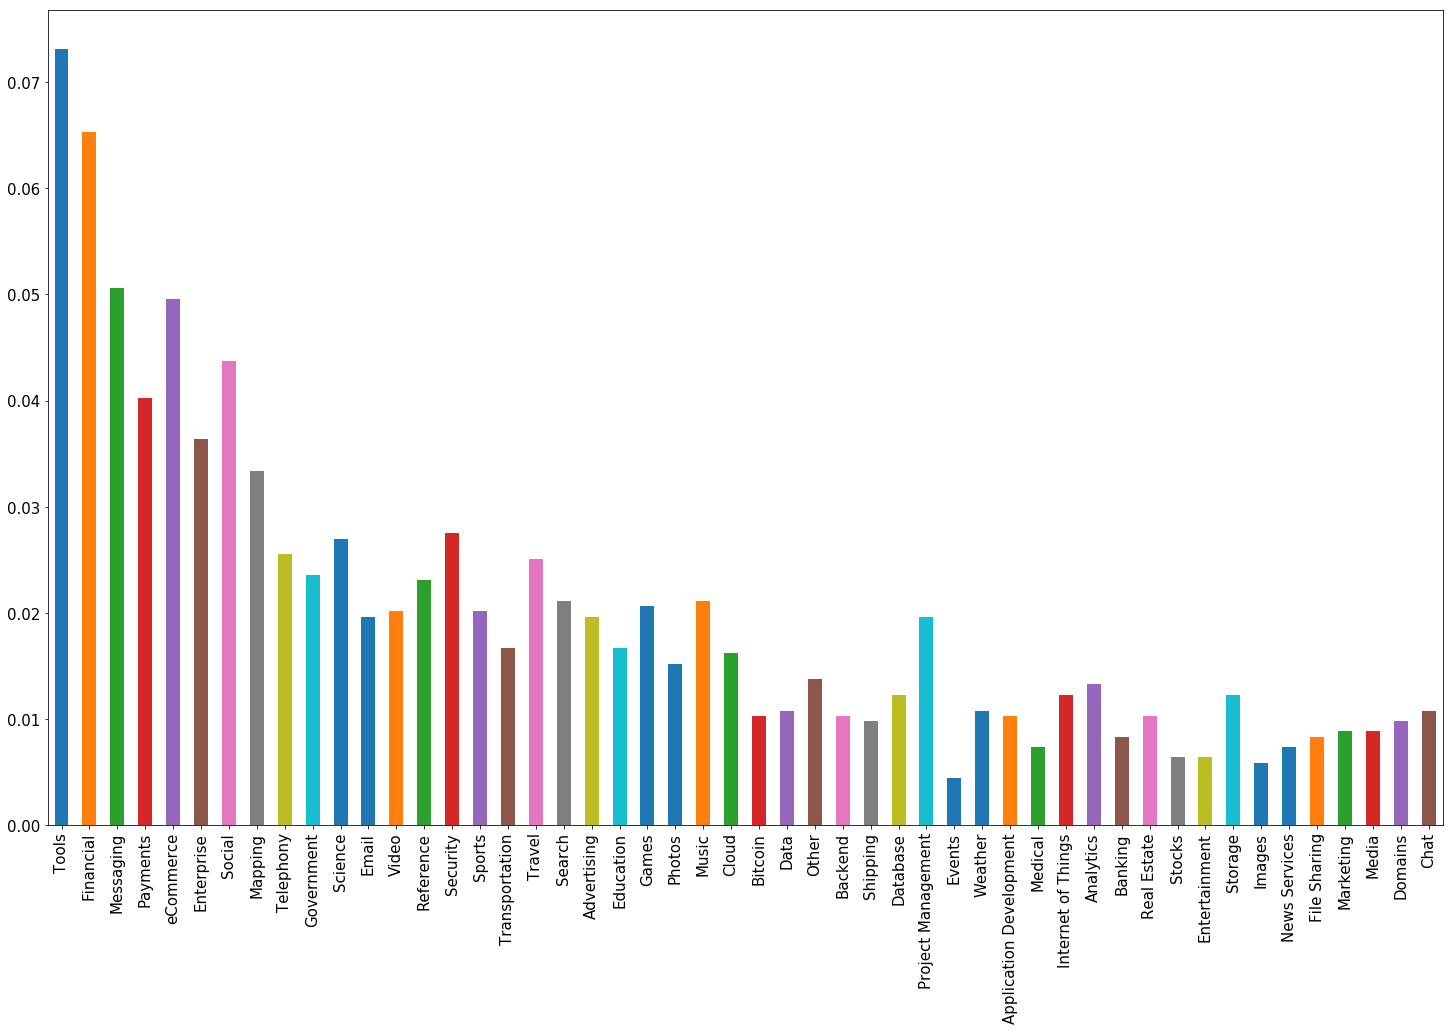

In [36]:
plt.figure(figsize=(25, 15))
TestP.plot(kind='bar', fontsize=15)
plt.savefig('../Data/TrainlabelHistogram.pdf', format='pdf', dpi=300)

In [37]:
comparedf = pd.DataFrame({'Training Set': trainP, 'Test Set': TestP})

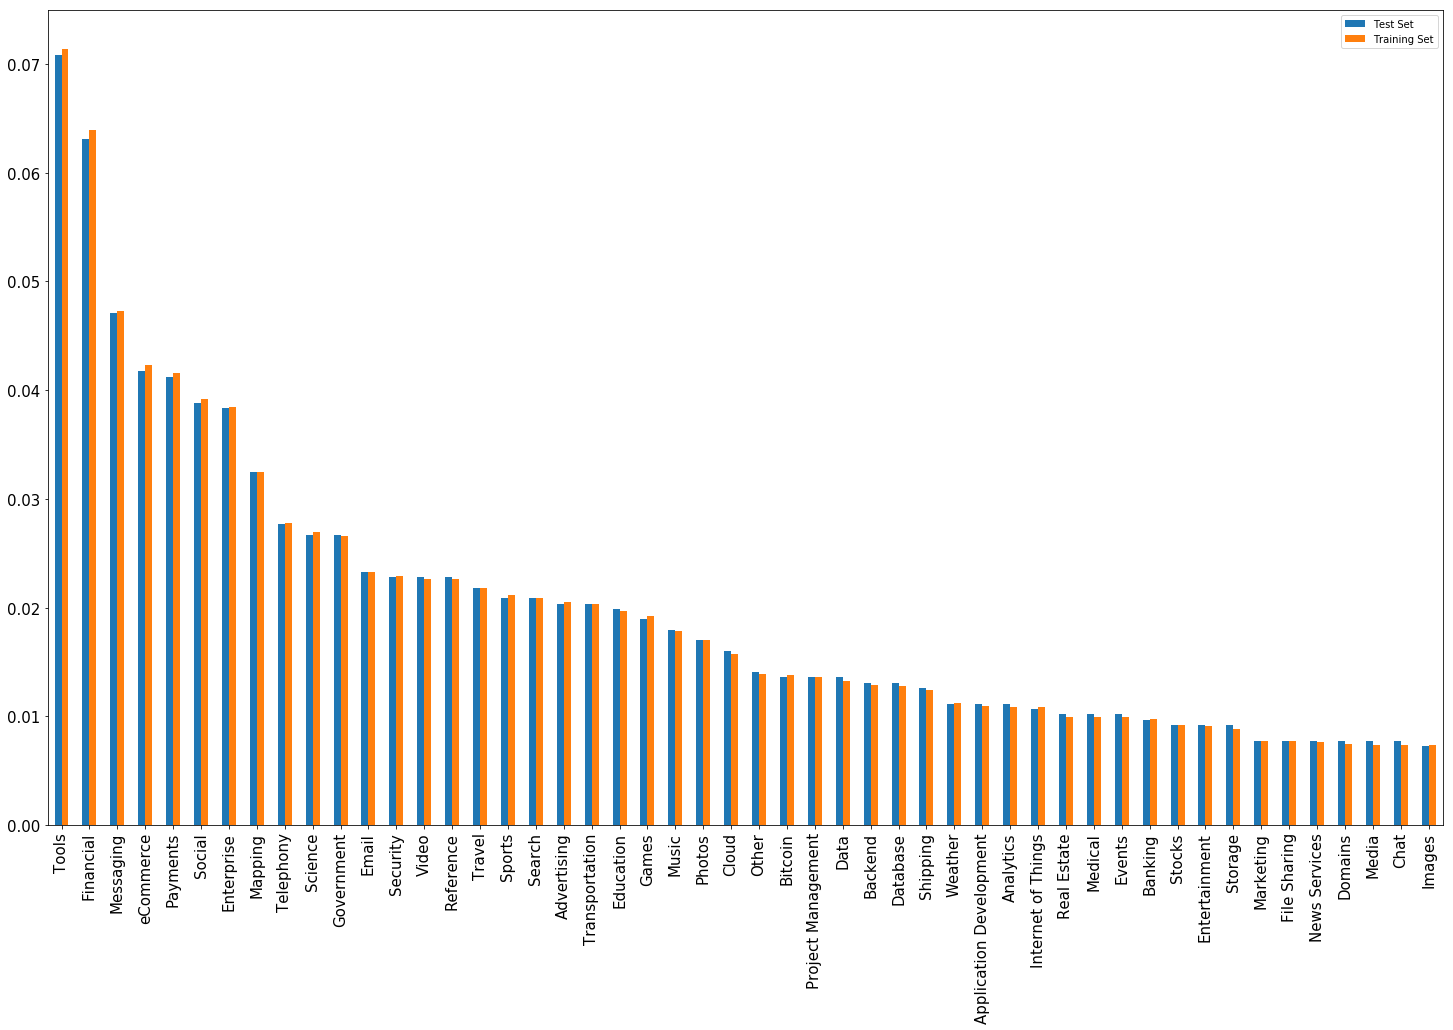

In [77]:
comparedf.plot(kind='bar', figsize=(25, 15),  fontsize=15)
plt.savefig('../Data/Comparasion_Trans_Test.pdf', format='pdf', dpi=300)

## 2. Random Sampling by Catagories Precentage

In [39]:
top50data['Service Classification']

1                    Social
3                    Photos
5                 eCommerce
7                     Music
10                  Mapping
13                   Social
17              Advertising
18                Reference
22                   Search
24                   Photos
28                    Music
29                Analytics
32                  Mapping
34                   Events
38                eCommerce
39                  Mapping
40                 Payments
41                    Music
42               Enterprise
44                   Search
45                   Photos
47                  Mapping
48                   Search
49                   Search
50                    Music
51                eCommerce
52                   Social
53                  Mapping
56                   Photos
57                    Media
                ...        
15306              Shipping
15307                Photos
15308               Medical
15310             Financial
15311            Ent

In [40]:
top50data[top50data['Service Classification'] == 'Social']

,Service Desciption,Service Classification
1,"It has been split into multiple APIs, includin...",Social
13,The Foursquare API provides location based exp...,Social
52,NationBuilder is an open platform for users to...,Social
63,Use the Tumblr API to read Tumblr data or to w...,Social
66,Facebook Social Plugins make a user's friend's...,Social
68,The MySpace Developer Platform (MDP) allows de...,Social
69,"Google Plus is a service to share links, photo...",Social
146,Note: This is in private beta as of March 2008...,Social
152,AngelList is a community of startups and inves...,Social
172,From Website: The Twitter Streaming API allows...,Social


In [41]:
Train = []
Test = []

for c in set(top50data['Service Classification']):
    C_data = top50data[top50data['Service Classification'] == c]
    C_Train, C_Test = train_test_split(C_data, test_size=0.2, random_state=0)
    Train.append(C_Train)
    Test.append(C_Test)
    
Train_C = pd.concat(Train)
Test_C = pd.concat(Test)

In [42]:
print(Train_C.shape)
print(Test_C.shape)

(8123, 2)
(2061, 2)


In [43]:
Train_C.head()

,Service Desciption,Service Classification
13615,StickyStreet is a SaaS (Software as a Service)...,eCommerce
13532,Affiliate Window is an affiliate marketing com...,eCommerce
5108,The PriceJSON API returns detailed pricing off...,eCommerce
12639,The service enables online book sales by partn...,eCommerce
108,Use Shopify's robust ecommerce APIs to create ...,eCommerce


In [44]:
Trainlabelcount = Train_C['Service Classification'].value_counts()

In [45]:
trainP = Trainlabelcount/Trainlabelcount.sum()

In [46]:
Testlabelcount = Test_C['Service Classification'].value_counts()

In [47]:
Testlabelcount = Testlabelcount[Trainlabelcount.index]

In [48]:
TestP = Testlabelcount/Testlabelcount.sum()

In [50]:
comparedf = pd.DataFrame({'Training Set': trainP, 'Test Set': TestP})

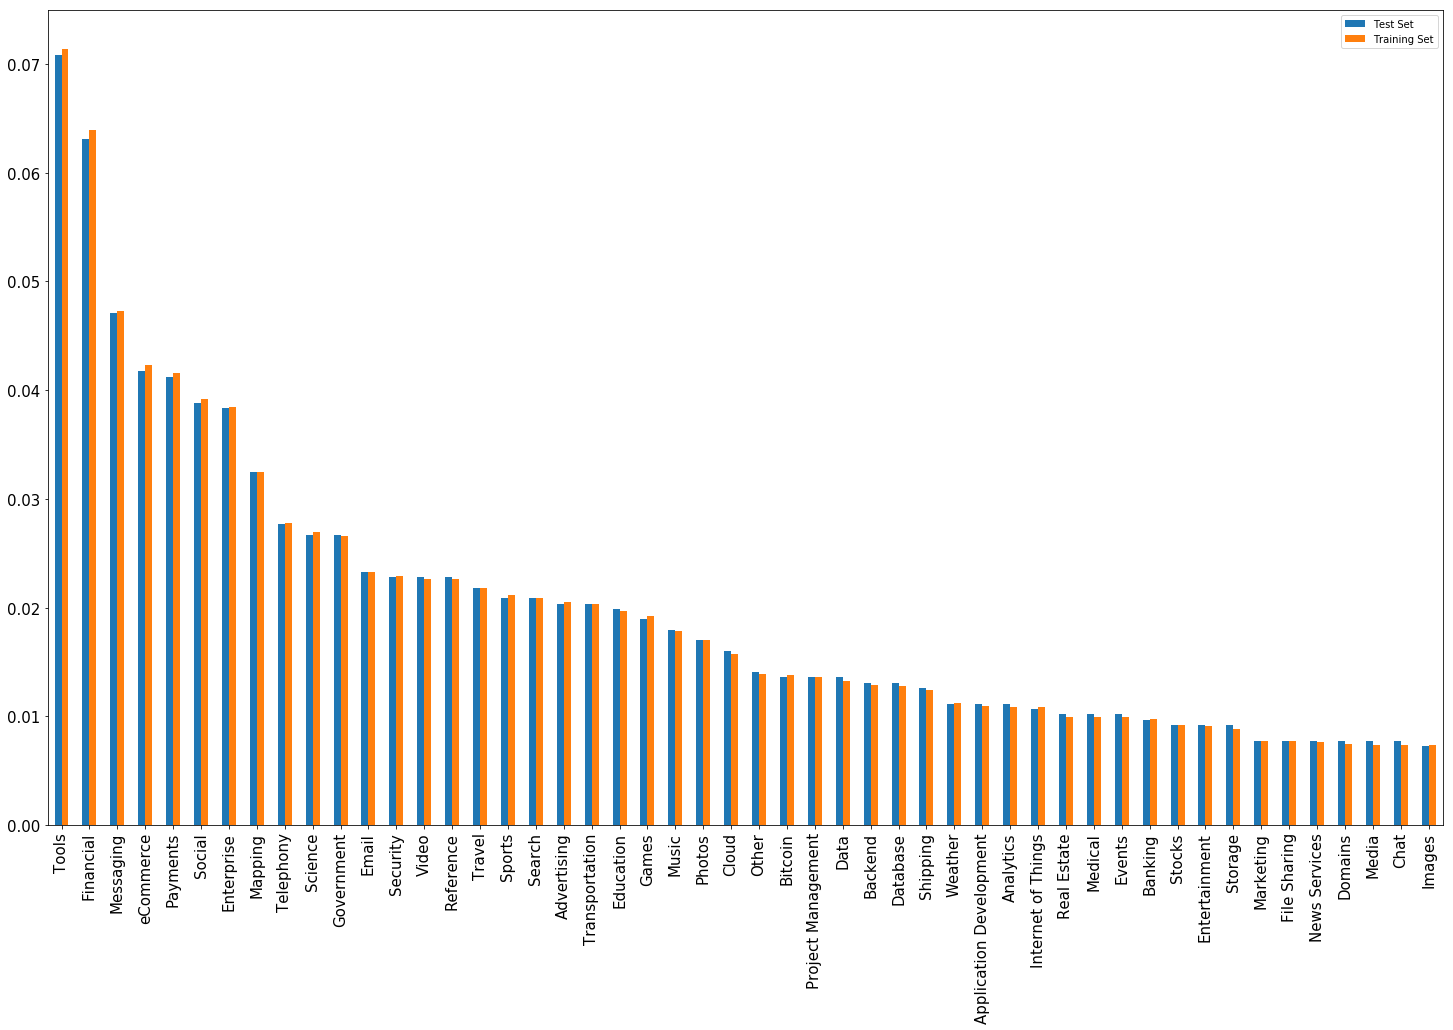

In [75]:
comparedf.plot(kind='bar', figsize=(25, 15),  fontsize=15)
plt.savefig('../Data/Comparasion_Trans_Test_Categories_precentage.pdf', format='pdf', dpi=300)

## Save as H5 file (pd to h5)

In [58]:
## shuffle
Train_C = Train_C.sample(frac=1)
Test_C = Test_C.sample(frac=1)

In [61]:
h5f = HDFStore('../Data/RandomSplittedByCatagories.h5')
h5f.put('AllData', top50data)
h5f.put('Train', Train_C)
h5f.put('Test', Test_C)
h5f.close()

In [62]:
TrainServices = read_hdf('../Data/RandomSplittedByCatagories.h5', key='Train')
TestServices = read_hdf('../Data/RandomSplittedByCatagories.h5', key='Test')
print(TrainServices.shape)
print(TestServices.shape)

(8123, 2)
(2061, 2)


## Random 10 times

In [76]:
for i in range(0, 10):

    Train = []
    Test = []

    for c in set(top50data['Service Classification']):
        C_data = top50data[top50data['Service Classification'] == c]
        C_Train, C_Test = train_test_split(C_data, test_size=0.2, random_state=i)
        Train.append(C_Train)
        Test.append(C_Test)

    Train_C = pd.concat(Train)
    Test_C = pd.concat(Test)
    
    Train_C = Train_C.sample(frac=1)
    Test_C = Test_C.sample(frac=1)
    
    h5f = HDFStore('../Data/RandomSplittedByCatagories' + str(i) + '.h5')
    h5f.put('AllData', top50data)
    h5f.put('Train', Train_C)
    h5f.put('Test', Test_C)
    h5f.close()